In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [2]:
csv_file = "./basicstats3_cleaned_enron.csv"


In [3]:
df = pd.read_csv(csv_file)


In [4]:
## Exploratory Data Analysis



In [9]:
# number of records already marked as spam
spam_count = len(df.loc[df['label']=='spam'].index)
print("Spam Messages: ", spam_count)

Spam Messages:  17171


In [10]:
ham_count = len(df.loc[df['label']=='ham'].index)
print("ham messages: ", ham_count)

ham messages:  16460


In [13]:
# are there any duplicates?  there could be I suppose?

mask = df.duplicated()
df[mask]

len(df[mask].index)



3213

In [15]:
df_unique = df.drop_duplicates()
df_unique.reset_index(inplace=True,drop=True)


In [16]:
# number of records already marked as spam
spam_count = len(df_unique.loc[df_unique['label']=='spam'].index)
print("Spam Messages: ", spam_count)
ham_count = len(df_unique.loc[df_unique['label']=='ham'].index)
print("ham messages: ", ham_count)

Spam Messages:  14576
ham messages:  15842


In [17]:
#create wordCloud...
# clean the text in the message.
clean_text_collection = []

for word in range(len(df_unique['email'])):
    #convert to lower case
    clean_text = df_unique['email'][word].lower()

    #remove punctuation
    clean_text = re.sub('[^a-zA-Z]', ' ', clean_text)

    #remove markup language tags
    clean_text = re.sub("&lt;/?.*&gt;", '&lt;&gt; ', clean_text)

    #remove digits and special characters
    clean_text = re.sub('(\\d | \\W)+', ' ', clean_text)

    clean_text_collection.append(clean_text)

# create a new column in the dataframe to hold the cleaned text
df_unique['clean_text'] = clean_text_collection




C:\Users\edkba\AppData\Local\Temp\ipykernel_3644\2335811230.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['clean_text'] = clean_text_collection


In [18]:
df_unique.head()


,email,label,clean_text
0,Subject: christmas tree farm pictures,ham,subject christmas tree farm pictures
1,"Subject: vastar resources , inc .gary , produc...",ham,subject vastar resources inc gary production...
2,Subject: calpine daily gas nomination- calpine...,ham,subject calpine daily gas nomination calpine d...
3,Subject: re : issuefyi - see note below - alre...,ham,subject re issuefyi see note below already ...
4,Subject: meter 7268 nov allocationfyi .\n- - -...,ham,subject meter nov allocationfyi forwarded by ...


In [19]:
#remove "stopwords"
stop_words = stopwords.words('english')

In [20]:
email_stop_words = ['re', 'fw', 'subject']

In [21]:
stop_words.extend(email_stop_words)

In [22]:
# create wordcloud object
word_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, max_words=100, min_font_size=20)


In [23]:
word_cloud = word_cloud.generate(str(df_unique['clean_text']))


(-0.5, 799.5, 799.5, -0.5)

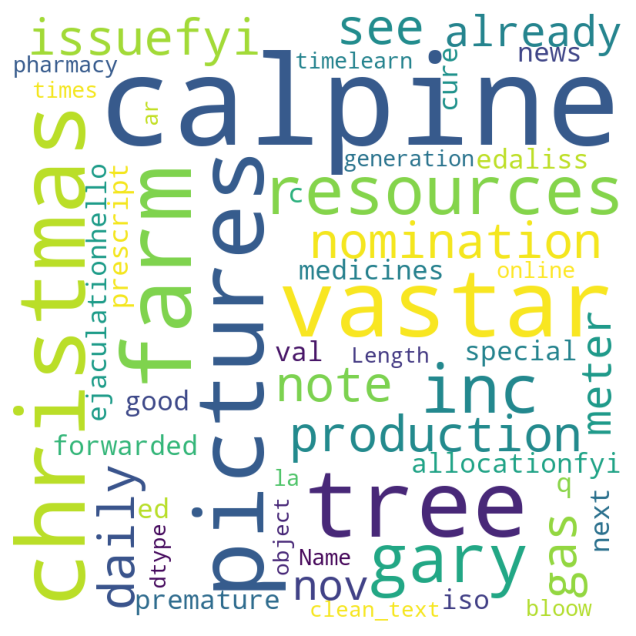

In [24]:
# plot the wordCloud
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')


In [25]:
#path of the clean file
cleaned_csv_loc = './Data_anaylsis_Cleaned_emails.csv'

In [26]:
#wrie the cleaned text back to a csv file with only the cleaned text column and the label column
df_unique[['label', 'clean_text']].to_csv(cleaned_csv_loc, index=False)

In [30]:
#check spam only words.
df_unique_spam = df_unique[df_unique['label']=='spam']

In [28]:
df_unique_spam.head()


,email,label,clean_text
3531,Subject: dobmeos with hgh my energy level has ...,spam,subject dobmeos with hgh my energy level has g...
3532,Subject: your prescription is ready . . oxwq s...,spam,subject your prescription is ready oxwq s f e...
3533,Subject: get that new car 8434people nowthe we...,spam,subject get that new car people nowthe weathe...
3534,"Subject: await your responsedear partner ,\nwe...",spam,subject await your responsedear partner we ar...
3535,"Subject: coca cola , mbna america , nascar par...",spam,subject coca cola mbna america nascar partne...


(-0.5, 799.5, 799.5, -0.5)

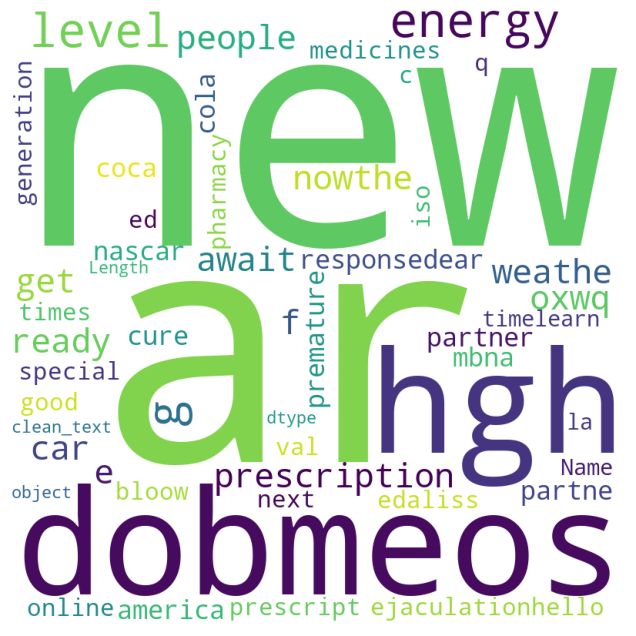

In [31]:
spam_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, max_words=100, min_font_size=20)
spam_cloud = spam_cloud.generate(str(df_unique_spam['clean_text']))
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(spam_cloud)
plt.axis('off')

In [32]:
#check ham only words.
df_unique_ham = df_unique[df_unique['label']=='ham']

(-0.5, 799.5, 799.5, -0.5)

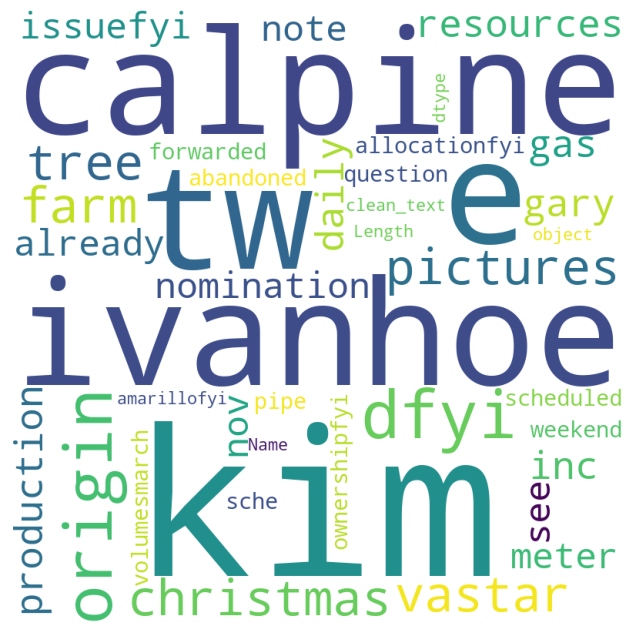

In [58]:
ham_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, max_words=100, min_font_size=20)
ham_cloud = ham_cloud.generate(str(df_unique_ham['clean_text']))
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(ham_cloud)
plt.axis('off')

In [43]:
#getting word counts
from collections import Counter
from nltk.tokenize import word_tokenize

dt = df_unique_spam['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


word_count = Counter(" ".join(dt).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

          Word  Frequency
0          com       9842
1      company       9495
2            e       7681
3         http       7491
4        email       6724
5  information       6453
6       please       6185
7   statements       5730
8           us       5377
9          may       5292


In [45]:
#ABOVE DID NOT WORK PROPERLY  This starts proper word Frequency attempt

spam_messages = " ".join(df_unique_spam['clean_text'])
spam_words = word_tokenize(spam_messages)


In [50]:
# clean up the messages
def clean_words(new_tokens):
    #new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens =[t for t in new_tokens if t not in stop_words]
    return new_tokens

In [51]:
important_words = clean_words(spam_words)

In [52]:
bow = Counter(important_words)
bow

Counter({'dobmeos': 1,
         'hgh': 77,
         'energy': 1326,
         'level': 426,
         'gone': 179,
         'stukmintroducing': 1,
         'doctor': 405,
         'formulated': 57,
         'human': 222,
         'growth': 1066,
         'hormone': 48,
         'also': 2467,
         'called': 265,
         'referred': 62,
         'medical': 630,
         'science': 146,
         'master': 130,
         'plentiful': 6,
         'young': 274,
         'near': 385,
         'age': 440,
         'twenty': 281,
         'one': 5042,
         'bodies': 83,
         'begin': 352,
         'produce': 183,
         'less': 831,
         'time': 4634,
         'forty': 54,
         'nearly': 195,
         'everyone': 327,
         'deficient': 5,
         'eighty': 32,
         'production': 724,
         'normally': 117,
         'diminished': 7,
         'least': 350,
         'advantages': 75,
         'increased': 419,
         'muscle': 210,
         'strength': 93,
       

<Axes: xlabel='frequency', ylabel='word'>

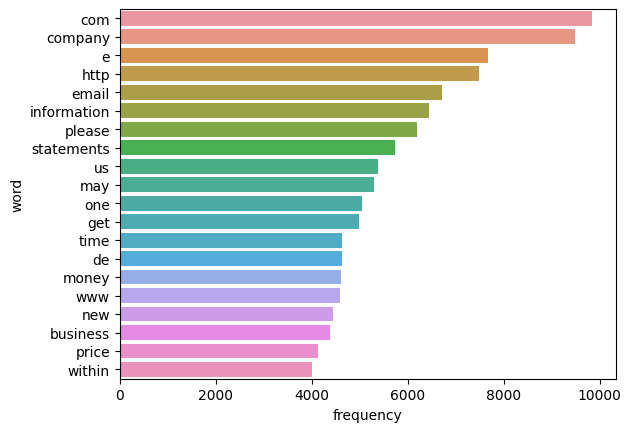

In [53]:
import seaborn as sns

data = pd.DataFrame(bow.items(), columns=['word','frequency']).sort_values(by='frequency', ascending=False)
data=data.head(20)
sns.barplot(x='frequency', y='word',data=data)

<Axes: xlabel='frequency', ylabel='word'>

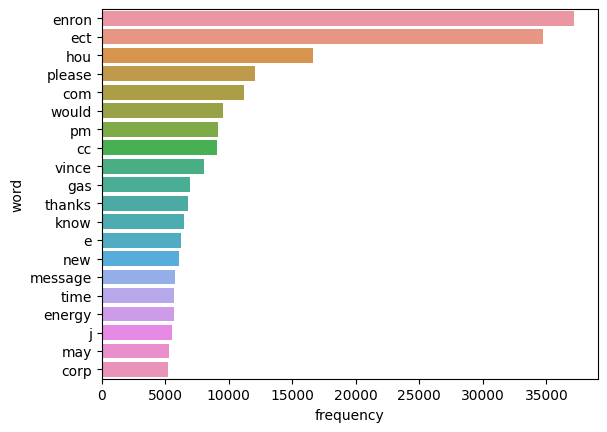

In [54]:
df_unique_ham = df_unique[df_unique['label']=='ham']
ham_messages = " ".join(df_unique_ham['clean_text'])
ham_words = word_tokenize(ham_messages)

important_words = clean_words(ham_words)

bow = Counter(important_words)
ham_data = pd.DataFrame(bow.items(), columns=['word','frequency']).sort_values(by='frequency', ascending=False)
ham_data=ham_data.head(20)
sns.barplot(x='frequency', y='word',data=ham_data)

In [55]:
bow

Counter({'christmas': 160,
         'tree': 42,
         'farm': 21,
         'pictures': 73,
         'vastar': 20,
         'resources': 1021,
         'inc': 1210,
         'gary': 857,
         'production': 1158,
         'high': 1135,
         'island': 76,
         'larger': 113,
         'block': 114,
         'commenced': 24,
         'saturday': 558,
         'p': 2803,
         'gross': 111,
         'carlos': 262,
         'expects': 160,
         'tomorrow': 1010,
         'owns': 79,
         'george': 761,
         'x': 1835,
         'forwarded': 3767,
         'weissman': 198,
         'hou': 16659,
         'ect': 34722,
         'daren': 1617,
         'j': 5518,
         'farmer': 1128,
         'rodriguez': 202,
         'cc': 9075,
         'melissa': 575,
         'graves': 274,
         'please': 12114,
         'call': 3853,
         'linda': 265,
         'get': 4247,
         'everything': 308,
         'set': 1604,
         'going': 1605,
         'estimate'